# Exercise 3: Generating homology groups from pseudo-landmark data

In this third exercise we will review one of the downstream applications of our batch plm data we generated in our previous exercise by generating de novo homology groups.  It should be noted that this method, while incredibly powerful, has some prior assumptions in its usage.  To drive home the point, THIS METHOD IS DESIGNED TO ESTIMATE GROUPS BY MAKING ASSUMPTIONS ABOUT BIOLOGICAL HOMOLOGY (i.e. not persistent homology which is an completely different analytical method!).

Ideally, when image data of sufficient quality is presented to this workflow homology groups could even be inferred to be orthologous to one another although, similar to (phylo)genetic clustering methods, you get out what you put in and so this may be subjective based on your dataset.  That being said, there are concievably two datasets where this homology grouping set is applicable:

1) Linking landmarks through time series image data to survey growth and development of independent structures through time.

2) Linking landmarks between comparable static materials either between individuals or genotypes for comparing variability of these landmarks in analogous organismal datasets (i.e. leaves with readily apparent lobes, awns, or sinuses, as one example).

Given our homology grouping workflow was designed for the former dataset we will work through a demonstration of how this works and how best to go about performing this analysis in an idealized dataset.  Let's get started by importing what we need...


In [1]:
%matplotlib inline
# Change inline to widget for interactive plots
from plantcv import plantcv as pcv
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
# PlantCV adjustable global parameters
pcv.params.debug = "plot"
pcv.params.text_size = 20
pcv.params.text_thickness = 10
pcv.params.line_thickness = 14
# Adjust plot sizes
pcv.params.dpi = 125

In [3]:
win = 25
thresh = 90

path = './imgs'
days = range(10, 14)
name_prefix = 'B100_rep1_d'

Before we get rolling though we'll have you enter in a output file path to save some graphs this workflow will generate which will be appended to our output prefix.


In [4]:
outpath = './output'
os.makedirs(outpath, exist_ok=True)
outfile_prefix = os.path.join(outpath, 'B100_d10_d11_test')

Now that we have what we need to rerun the script we walked through in the previous exercise let's run through the code block we covered last time (with a few modifications to the outputs) and then think about how best to move forward with our landmark outputs.


Contour volume: 2184.140382528305
Fusing contour edges
route C
Landmark site: 1841, Start site: 1819, Term. site: 21
Landmark point indices: [1841]
Starting site indices: [1819]
Termination site indices: [21]
route C
Landmark site: 308, Start site: 284, Term. site: 333
Landmark point indices: [1841, 308]
Starting site indices: [1819, 284]
Termination site indices: [21, 333]
route C
Landmark site: 553, Start site: 528, Term. site: 577
Landmark point indices: [1841, 308, 553]
Starting site indices: [1819, 284, 528]
Termination site indices: [21, 333, 577]
route C
Landmark site: 883, Start site: 869, Term. site: 894
Landmark point indices: [1841, 308, 553, 883]
Starting site indices: [1819, 284, 528, 869]
Termination site indices: [21, 333, 577, 894]
route C
Landmark site: 976, Start site: 948, Term. site: 1001
Landmark point indices: [1841, 308, 553, 883, 976]
Starting site indices: [1819, 284, 528, 869, 948]
Termination site indices: [21, 333, 577, 894, 1001]
route C
Landmark site: 1110

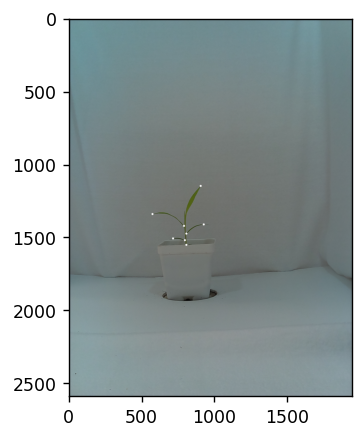

    landmark number: 8
Contour volume: 2436.750554203987
Fusing contour edges
route C
Landmark site: 2070, Start site: 2047, Term. site: 18
Landmark point indices: [2070]
Starting site indices: [2047]
Termination site indices: [18]
route C
Landmark site: 265, Start site: 241, Term. site: 289
Landmark point indices: [2070, 265]
Starting site indices: [2047, 241]
Termination site indices: [18, 289]
route C
Landmark site: 401, Start site: 377, Term. site: 428
Landmark point indices: [2070, 265, 401]
Starting site indices: [2047, 241, 377]
Termination site indices: [18, 289, 428]
route C
Landmark site: 598, Start site: 574, Term. site: 620
Landmark point indices: [2070, 265, 401, 598]
Starting site indices: [2047, 241, 377, 574]
Termination site indices: [18, 289, 428, 620]
route C
Landmark site: 839, Start site: 816, Term. site: 862
Landmark point indices: [2070, 265, 401, 598, 839]
Starting site indices: [2047, 241, 377, 574, 816]
Termination site indices: [18, 289, 428, 620, 862]
route 

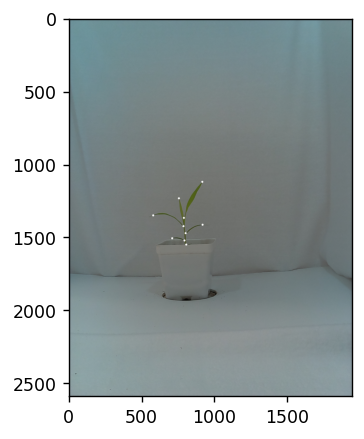

    landmark number: 10
Contour volume: 2664.7160643339157
Fusing contour edges
route C
Landmark site: 0, Start site: 2242, Term. site: 21
Landmark point indices: [0]
Starting site indices: [2242]
Termination site indices: [21]
route C
Landmark site: 280, Start site: 258, Term. site: 303
Landmark point indices: [0, 280]
Starting site indices: [2242, 258]
Termination site indices: [21, 303]
route C
Landmark site: 494, Start site: 472, Term. site: 519
Landmark point indices: [0, 280, 494]
Starting site indices: [2242, 258, 472]
Termination site indices: [21, 303, 519]
route C
Landmark site: 773, Start site: 750, Term. site: 799
Landmark point indices: [0, 280, 494, 773]
Starting site indices: [2242, 258, 472, 750]
Termination site indices: [21, 303, 519, 799]
route C
Landmark site: 1008, Start site: 988, Term. site: 1031
Landmark point indices: [0, 280, 494, 773, 1008]
Starting site indices: [2242, 258, 472, 750, 988]
Termination site indices: [21, 303, 519, 799, 1031]
route C
Landmark s

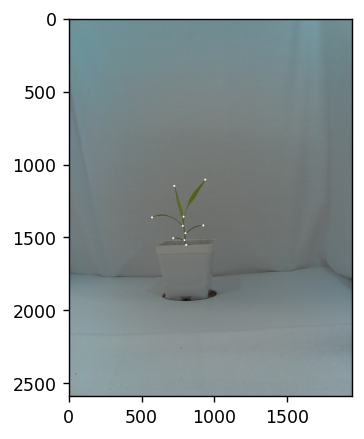

    landmark number: 10
Contour volume: 2932.647084593773
Fusing contour edges
route C
Landmark site: 0, Start site: 2442, Term. site: 22
Landmark point indices: [0]
Starting site indices: [2442]
Termination site indices: [22]
route C
Landmark site: 358, Start site: 333, Term. site: 386
Landmark point indices: [0, 358]
Starting site indices: [2442, 333]
Termination site indices: [22, 386]
route C
Landmark site: 595, Start site: 573, Term. site: 617
Landmark point indices: [0, 358, 595]
Starting site indices: [2442, 333, 573]
Termination site indices: [22, 386, 617]
route C
Landmark site: 926, Start site: 905, Term. site: 943
Landmark point indices: [0, 358, 595, 926]
Starting site indices: [2442, 333, 573, 905]
Termination site indices: [22, 386, 617, 943]
route C
Landmark site: 1004, Start site: 978, Term. site: 1027
Landmark point indices: [0, 358, 595, 926, 1004]
Starting site indices: [2442, 333, 573, 905, 978]
Termination site indices: [22, 386, 617, 943, 1027]
route C
Landmark si

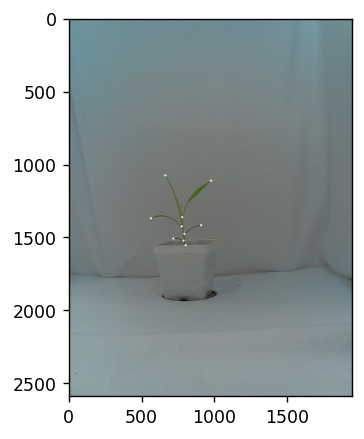

    landmark number: 10


In [5]:
landmark_output=[['group', 'plmname', 'filename', 'plm_x', 'plm_y', 'SS_x', 'SS_y', 'TS_x', 'TS_y', 'CC_ratio']]
for day in days:
    # Turn off debugging outputs for most steps to avoid a huge amount of output
    pcv.params.debug = None
    # 1. Reading our image into the environment
    img, imgpath, imgname = pcv.readimage(filename=os.path.join(path, f"{name_prefix}{day}.jpg"))
    
    # 2. Converting our RGB image into an Lab color space and extract the a and b channels
    img_a = pcv.rgb2gray_lab(rgb_img=img, channel="a")
    img_b = pcv.rgb2gray_lab(rgb_img=img, channel="b")
    
    # 3. Thresholding our a and b color channels to create two masks
    mask_a = pcv.threshold.binary(gray_img=img_a, threshold=123, max_value=255, object_type="dark")
    mask_b = pcv.threshold.binary(gray_img=img_b, threshold=133, max_value=255, object_type="light")
    
    # 4. Merging our individual a and b thresholded masks
    mask = pcv.logical_and(bin_img1=mask_a, bin_img2=mask_b)
    
    # 5. Extracting our contours from the final mask
    cnt, cnt_str = pcv.find_objects(img=img, mask=mask)
    
    # 6. Find largest contour of subject (outer boundary of subject)
    roi, roi_str = pcv.roi.rectangle(img=img, x=500, y=500, h=1100, w=800)
    kept_cnt, kept_str, kept_mask, kept_area = pcv.roi_objects(img=img, roi_contour=roi, roi_hierarchy=roi_str, 
                                                               object_contour=cnt, obj_hierarchy=cnt_str, roi_type="largest")
    
    # 7. Extracting pseudo-landmarks from the plant contours
    plt_img = np.copy(img)
    for cont in kept_cnt:
        if cv2.arcLength(cont, True) > 2*win:
            print(f'Contour volume: {cv2.arcLength(cont, True)}')
            # Turn debugging back on for acute
            pcv.params.debug = "plot"
            homolog_pts, homolog_start, homolog_stop, homolog_cc, chain, verbose = pcv.homology.acute(img=img, obj=cont, mask=mask,
                                                                                                      win=win, threshold=thresh)
            print(f'    landmark number: {len(homolog_pts)}')

            for h in range(0, len(homolog_pts)):
                landmark_output.append([None, f"{name_prefix}{day}_plm{h+1}", f"{name_prefix}{day}", homolog_pts[h][0][0], homolog_pts[h][0][1], 
                                        homolog_start[h][0][0], homolog_start[h][0][1], homolog_stop[h][0][0], homolog_stop[h][0][1], homolog_cc[h],])

# Convert out output to a pandas dataframe for ease of use hereafter...
landmark_pandas = pd.DataFrame(landmark_output[1:len(landmark_output)], columns=landmark_output[0][0:11])

Now that we have our analyses run again let's have another look at data to think about how we'll proceed...

In [6]:
landmark_pandas.head()

,group,plmname,filename,plm_x,plm_y,SS_x,SS_y,TS_x,TS_y,CC_ratio
0,None,B100_rep1_d10_plm1,B100_rep1_d10,901,1151,892,1173,885,1167,255.000000
1,None,B100_rep1_d10_plm2,B100_rep1_d10,787,1425,789,1401,773,1405,6.219512
2,None,B100_rep1_d10_plm3,B100_rep1_d10,571,1344,594,1338,595,1342,255.000000
3,None,B100_rep1_d10_plm4,B100_rep1_d10,793,1523,796,1511,783,1519,18.888889
4,None,B100_rep1_d10_plm5,B100_rep1_d10,712,1511,736,1508,736,1512,255.000000


Thus far, we've largely been considering this data as a table where we really only cared about our X-Y coordinates that describe our plms. However, when we think about this matrix beyond the the filename and plm x/y columns we can see that we really have quite a few extra dimensions which add some context to our data.  These added dimensions were originally deemed to be potentially useful for generating a rich multivariate dataset to to pull these plms together into homology groups.  `space` no longer is seen as a required component of this pipeline, however, given that analyses seem to only produce negligibly better results with it's inclusion.  That being said, this approach does produce some novel types of metadata which could have alternative applications so we'll at least discuss what `space` is doing here in it's original context, even if we gloss over it in tutorial 4. You may have also noticed we now have a new empty column we've added that didn't exist before called 'group' but for now we'll just ignore it. 

To begin, let's take our initial outputs from Acute and expand them into our expanded multivariate space to use for homology grouping.


In [7]:
day = 10
group_iter = 1

filenames = landmark_pandas.loc[:,['filename']].values
cur_plms = landmark_pandas[filenames==name_prefix+str(day)]
cur_plms = cur_plms.append(landmark_pandas[filenames==name_prefix+str(day+1)])

cur_plms = pcv.homology.space(cur_plms, include_bound_dist=True, include_centroid_dist=True, include_orient_angles=True)

  group             plmname       filename  plm_x  plm_y  SS_x  SS_y  TS_x  \
0  None  B100_rep1_d10_plm1  B100_rep1_d10    901   1151   892  1173   885   
1  None  B100_rep1_d10_plm2  B100_rep1_d10    787   1425   789  1401   773   
2  None  B100_rep1_d10_plm3  B100_rep1_d10    571   1344   594  1338   595   
3  None  B100_rep1_d10_plm4  B100_rep1_d10    793   1523   796  1511   783   
4  None  B100_rep1_d10_plm5  B100_rep1_d10    712   1511   736  1508   736   

   TS_y    CC_ratio  bot_left_dist  bot_right_dist  top_left_dist  \
0  1167  255.000000     521.647390      404.545424     331.185748   
1  1405    6.219512     252.103153      187.416648     371.295031   
2  1342  255.000000     211.000000      409.538765     221.000000   
3  1519   18.888889     224.294449      132.909744     457.475682   
4  1512  255.000000     147.705789      214.560015     412.825629   

   top_right_dist  centroid_dist  orientation  centroid_orientation  
0       35.000000     284.613773  -146.659293 

Now as we look at our outputs from the `space` function we can see that there is clearly quite a bit of extra information we've just added. Let's breakdown what each of these new elements are item by item just to understand what new information we've generated.  

To begin we can consider five distance elements, 'bot_left_dist', 'bot_right_dist', 'top_left_dist', 'top_right_dist', and 'centroid_dist'.  These new values are distances between the plms representing each row and the bounding box corners capturing our current image pairs plms. In addition, we also calculate a centroid point for our current image pair to generate a distance from the 'center of gravity' for these paired plms.  Given we've largely focused on spatial positions alone distance measures, while analogous in terms of being pixel measures, help by giving us some added indication as to where in space our landmarks fall compared to one another.  

Beyond these distance measures we have two other elements, 'orientation' and 'centroid_orientation'.  As could be anticipated from these names these elements are both providing some additional information about the direction of the plms in space as opposed to raw distance measures, however, they are accomplishing this in very different ways.  The 'orientation' measures are based purely on the plm, SS, TS coordinates in which the midpoint between SS and TS are calculated and this midpoint is then used to drive a line towards the plm to generate a slope. Following the generation of a slope an angle can be generated using the formula:
   
    angle = arctan(slope)*(180/pi)

By contrast, the 'centroid_orientation' begins at the centroid and drives a line towards the plm to generate a slope then uses a similar formula to what was described above in order to calculate an angle of orientation.  

Now that we have a multivariate dataset that is rich in context for comparisons to be made we can begin to determine how similar or distant they are to one another through time. For the initial steps we will use two approaches, PCA which is extremely useful in maximizing the amount of variation while reducing dimensionality (key in a dataset such as ours) followed by clustering approaches used to link nearest neighbors (which will help us stitch our plms together through time).

Let's begin with our PCA approach which will be found within our `starscape` function...


Eigenvalues:  [7.64297273 4.79923162 1.56909281 0.33569542] 


Var. Explained:  [0.51559737 0.32375769 0.1058515  0.02264612] 


Cumul. Var. Explained:  [0.51559737 0.83935506 0.94520655 0.96785267] 


3  components sufficiently informative


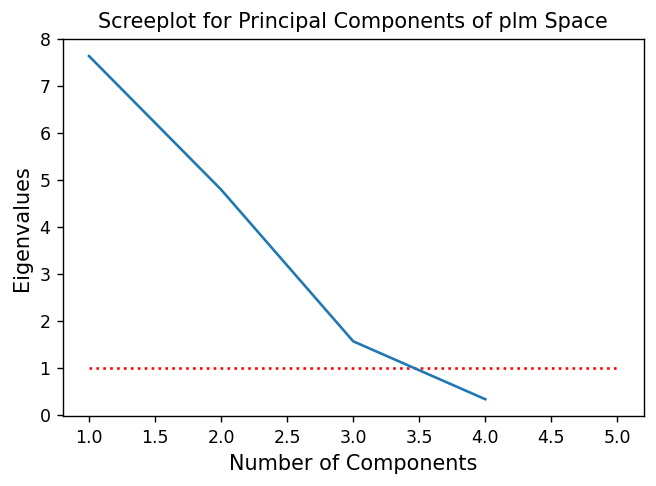

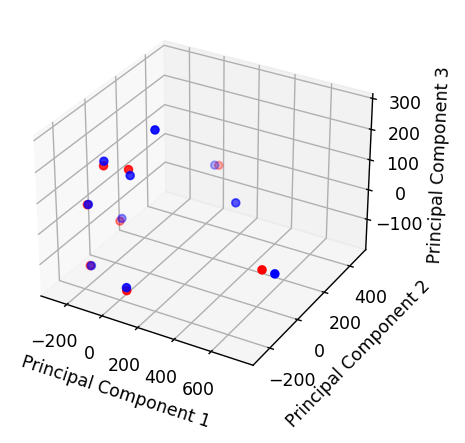

In [8]:
groupA = f"{name_prefix}{day}"
groupB = f"{name_prefix}{day+1}"
finalDf, eigvals, loadings = pcv.homology.starscape(cur_plms, groupA, groupB, outfile_prefix)

In [9]:
finalDf.head()

,plmname,filename,PC1,PC2,PC3
0,B100_rep1_d10_plm1,B100_rep1_d10,679.414040,-71.488066,-34.624416
1,B100_rep1_d10_plm2,B100_rep1_d10,-62.215929,-55.052674,153.806037
2,B100_rep1_d10_plm3,B100_rep1_d10,14.256346,475.918362,-30.316153
3,B100_rep1_d10_plm4,B100_rep1_d10,-237.327344,-127.302125,38.876346
4,B100_rep1_d10_plm5,B100_rep1_d10,-274.667223,120.381513,-126.398386


Using the StarScape function above a principal component analysis is undertaken to reduce the dimensionality of our multivariate space to a minimal number of maximally informative dimensions (3 in this example) while also providing some helpful outputs for consideration as we perform our later homology grouping with Constella.  When running StarScape in debugging mode as we have it should be noted that various attributes of the PCA which was performed such as the eigenvalues and eigenvectors will be printed as outputs.

The first of the graphical outputs that StarScape produces is a scree plot.  The eigenvalues plotted in this graph are used to dynamically define the number of components required for explaining the relationship of our plms groupings within multivariate space.  As we can observe in this scree plot, as can be expected with most PCA analyses, that the vast majority of our variance can be explained with the first few dimensions which are then stored as an output dataframe. The number of output components can be defined by the user although it is recommended to have a strong reasoning from deviating from the default setting built within this script. 

Following the identification of our number of informative components we can then observe our 'starscape' as two overlaid scatter plots reflecting the first three PC dimensions.  In this graph we can also observe that our two perspectives in time between this image neighbor pair are color coded allowing us to see that in fact several of these plms appear to be almost perfectly overlapping through time suggesting they likely represent the same structure. This neighbor pair was purposefully chosen for this demonstration as we can see day 11 has 2 points which appear to lack partners.  This is due to the fact that a new leaf was exerted in this frame resulting in two new plms representing a leaf tip and ligule.  

This PC space will provide a perfect test case for our demonstrating the methodology of our homology grouping script Constella...  


18 plms to group


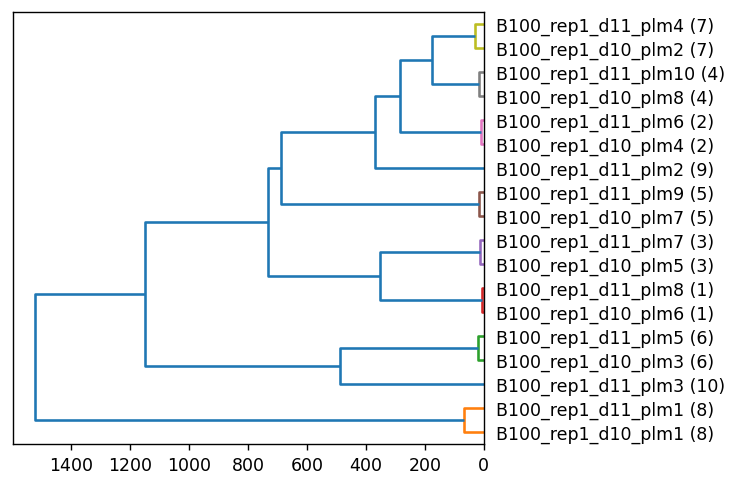

In [10]:
cur_plms, group_iter = pcv.homology.constella(cur_plms=cur_plms, pc_starscape=finalDf, group_iter=group_iter, outfile_prefix=outfile_prefix)

Although we initially only see the hierarchical cluster used by Constella shown as a dendrogram graphic quite a bit has actually happened when we ran this function in order to generate our homology groupings!

Let's start by thinking about what our hierarchical cluster of our neighboring frames looks like in this graphic.  We can see that for the vast majority of our plms there appear to be paired points which correspond to a plm from each frame (given the 3D plot from our starscape plot this probably isn't much of a surprise!).  Given this initial finding it would almost seem at first glance that focusing on groups consisting of two plms would be sufficient, however, there is some nuance to plm datasets given they are dynamically describing growth as it occurs.  For example, we can see at least one case in which clusters of three plms form within this dendrogram, and another more complex situation in which day 11 plm 2 becomes a rogue point in the proximity of a pair of homology groups.  In each of these cases one of the emergent plms that just appeared in the day 11 frame is clustering around its nearest cluster pair in the starscape output.  Even when they are no longer emergent it is often common for these new points to rapidly migrate for several days before reaching stationarity as the structure they represent grows and eventually arrests its development.  As such we need a fairly robust means of describing structures which are more or less non-moving while also being able to dynamically characterize noisier subcomponents of the dataset which may be undertaking fairly rapid change for a transient period of time.  Ultimately Constella is designed around the concept for describing groups as duets which are adjacent to one another in time.  Let's use a series of examples to grasp this concept:

## Constella homology grouping example (i.e. identifying duets, quartets, and rogues)

1)
                                        
                     --- Day 11 Group 1   |   As we look at this initial illustration of a dendrogram it is clear
    ----------------|                     |   that there is a clear group which we refer to as a 'duet' which will
                     --- Day 12 Group 1   |   share a group ID serial number during Constella de novo assignment.

2)

                     --- Day 11 Group 1   |  As development continues things often become more complicated with
                ----|                     |  novel structures begin to appear and lacking partners due to their 
               |     --- Day 12 Group 1   |  recent appearance they often cluster around a known duet. These 
    -----------|                          |  points which appear to lack any notable partner to pair with are
                -------- Day 12 Group 2   |  referred to as rogues and are often given their own group ID number.
                
3) 

                     --- Day 12 Group 1   |  Development continues and further evidence begins to accumuluate for 
                ----|                     |  group 2 with a partner now appearing in day 13.  However, when growth
               |     --- Day 13 Group 1   |  is rapidly occuring duets sometimes have difficulty manifesting due 
             --|                          |  to rapid changes between day 12 and 13 for group 2. This leads to a
            |  |                          |  grade luck structure as shown here we refer to as a quartet which is
    --------|   -------- Day 12 Group 2   |  merely an artifact of a similar problem known as 'long branch attract
            |                             |  -ion' in phylyogenetics. So long as a grade of 2 plms exactly can be
             ----------- Day 13 Group 2   |  resolved a quartet can be used to assign the identity of group 2.

4)

                     --- Day 13 Group 1   |  As development continues and the rapid growth that gave rise to the   
         -----------|                     |  quartet structure abates we can begin to clearly resolve duets for
        |            --- Day 14 Group 1   |  groups 1 and 2.  These structured duets often make up the bulk of 
    ----|                                 |  our dendrogram results as shown above which, like figure (1) can 
        |        ------- Day 13 Group 2   |  readily be used to assign group identities to duets.
         -------|
                 ------- Day 14 Group 2
                     
In the manner described above, Constella operates through iteratively assigning points identities through an expanding nearest neighbor homology grouping scheme which is superfically similar to neighbor joining.  Although these steps are critical to defining how Constella weighs homology, as important is how Constella chooses to define new serial number identities vs. perserving existing ones:  

## Constella groups: seeding vs. linking

Now that we have covered the basics of how Constella detects groups it is worth taking a moment to discuss how Constella assigns names.  There are generally two strategies which largely are based on if prior encounters with plms that are being grouped through image series/time series data has occurred.  When we first began this notebook we assigned the variable 'group_iter' to 1 which serves as our counter variable for assigning serial numbers to each homology group as Constella detects them.  When a novel group is detected, be it a duet, graded pair in a quartet, or rogue plms Constella 'seeds' these groups by assigning them the current group_iter number and iterating the counter by one.  By contrast, some groups should be expected to appear for several images in a row, especially in time series data, and in these cases an identity is already established for one of the current pair.  In these cases 'linking' occurs in which the known identity for one of the pair is passed on to the yet to be defined member so that the identity of this group is allowed to be carried through time or across an image series of analogous data. 

Given this naming strategy of assigning numbers as identities it is probably worth noting that although Constella is designed for use in homology-based approaches it operates in an analogous sphere to de novo genome assemblers in that although both can identify probable relationships (either as genomic scaffolds or plm linkage groups) it makes no attempt to assign known identity to these groups akin to changing scaffold identities to that of known chromosomes for a given genome.  This step of defining plm groups as a specific leaf tip, a leaf axil/ligule, or a floral structure such as an inflorescence apex is a post analysis step to be undertaken by an end user.

#### Where we left off...

Now that we have a thorough understanding of exactly what we did by running running Constella it would probably be good to see how well it did wouldn't it? Let's have a look!


In [11]:
cur_plms

,group,plmname,filename,plm_x,plm_y,SS_x,SS_y,TS_x,TS_y,CC_ratio,bot_left_dist,bot_right_dist,top_left_dist,top_right_dist,centroid_dist,orientation,centroid_orientation
0,8,B100_rep1_d10_plm1,B100_rep1_d10,901,1151,892,1173,885,1167,255.000000,521.647390,404.545424,331.185748,35.000000,284.613773,-146.659293,155.506063
1,7,B100_rep1_d10_plm2,B100_rep1_d10,787,1425,789,1401,773,1405,6.219512,252.103153,187.416648,371.295031,330.800544,15.524175,-15.255119,14.931417
2,6,B100_rep1_d10_plm3,B100_rep1_d10,571,1344,594,1338,595,1342,255.000000,211.000000,409.538765,221.000000,414.779459,222.036033,99.659893,-72.707551
3,2,B100_rep1_d10_plm4,B100_rep1_d10,793,1523,796,1511,783,1519,18.888889,224.294449,132.909744,457.475682,420.286807,113.441615,-23.629378,5.057249
4,3,B100_rep1_d10_plm5,B100_rep1_d10,712,1511,736,1508,736,1512,255.000000,147.705789,214.560015,412.825629,441.184769,123.458495,92.385944,-144.893921
5,1,B100_rep1_d10_plm6,B100_rep1_d10,803,1555,795,1533,807,1532,255.000000,232.000000,119.000000,490.354973,448.090393,146.372812,-5.079608,7.853313
6,5,B100_rep1_d10_plm7,B100_rep1_d10,922,1415,898,1420,898,1416,255.000000,377.890196,140.000000,456.579675,292.000000,139.089899,-97.125016,87.939889
7,4,B100_rep1_d10_plm8,B100_rep1_d10,803,1478,816,1459,801,1454,12.207447,244.444268,141.739197,424.086076,374.414209,70.880181,165.650668,16.389540
8,8,B100_rep1_d11_plm1,B100_rep1_d11,912,1123,904,1146,895,1139,255.000000,550.368059,432.115725,341.000000,10.000000,314.658545,-147.339087,155.797162
9,9,B100_rep1_d11_plm2,B100_rep1_d11,786,1370,794,1347,784,1346,0.000000,283.637092,229.610540,327.466029,281.966310,40.112342,172.724995,175.710847


It definitely appears as if we have paired groups between the majority of our plms across days 10 and 11! The only exceptions appear to be two plms specific to day 11 which are assigned to groups 9 and 10.  It would probably be worth seeing how these stack up on our original data (i.e. the images) since these data tables are often aren't the easiest to process.  With that being said, let's superimpose these groups onto the plms coordinates on each frame to see if they are in agreement.


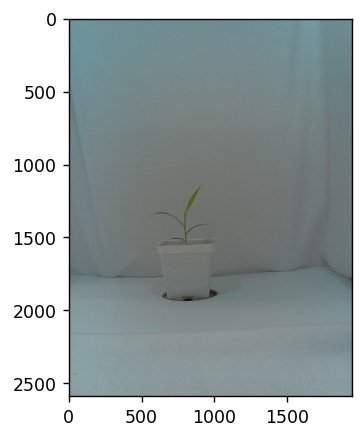

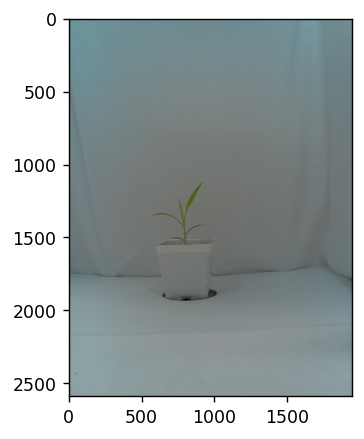

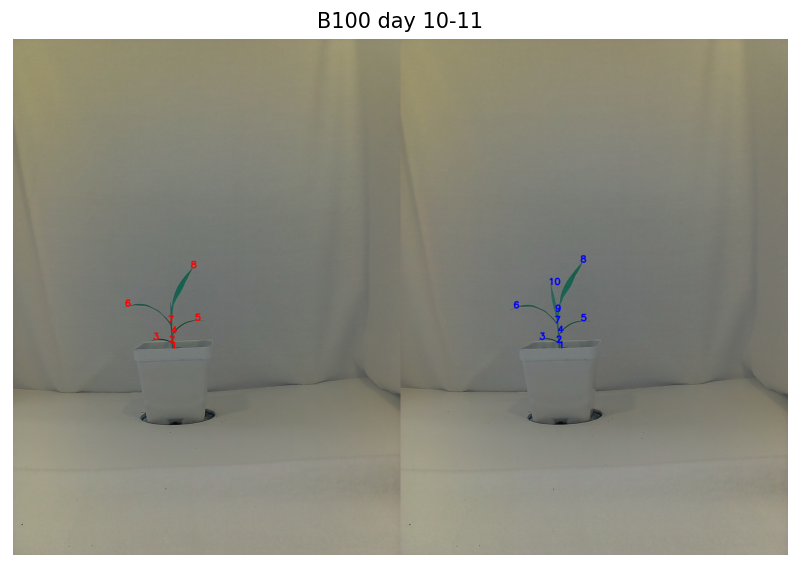

In [13]:
img1, _, _ = pcv.readimage(filename=os.path.join(path, f"{name_prefix}{day}.jpg"))

for p in range(0, cur_plms.shape[0]):
    if f"{name_prefix}{day}" in cur_plms.at[p, 'plmname']:        
        cv2.putText(img1, str(cur_plms.at[p, 'group']), 
                    (int(cur_plms.at[p, 'plm_x'])-10, int(cur_plms.at[p, 'plm_y'])), 
                    cv2.FONT_ITALIC, 1.5, (255,0,0), 6)

img2, _, _ = pcv.readimage(filename=os.path.join(path, f"{name_prefix}{day + 1}.jpg"))

for p in range(0, cur_plms.shape[0]):
    if f"{name_prefix}{day + 1}" in cur_plms.at[p, 'plmname']:        
        cv2.putText(img2, str(cur_plms.at[p, 'group']), 
                    (int(cur_plms.at[p, 'plm_x'])-10, int(cur_plms.at[p, 'plm_y'])), 
                    cv2.FONT_ITALIC, 1.5, (0,0,255), 6)
  
img_neighbors = cv2.hconcat((img1, img2))

plm_groups_fig=plt.figure(figsize=(8, 6))
plm_groups_fig=plt.imshow(img_neighbors)
plm_groups_fig=plt.xscale('linear')
plm_groups_fig=plt.axis('off')
plm_groups_fig=plt.title(f'B100 day {day}-{day + 1}')
plt.show(plm_groups_fig)

Looking at our groups overlaid against the leaf tips and ligules it seems like our attempts at forming homology groups through our workflow was a success! And note how our ligule and leaf tip plms corresponding to the emergent leaf in day 11 are represented by groups '9' and '10' which didn't appear in our first frame, seeding new groups as novel structures appear is clearly working as advertised as well! 

Now that we understand how homology grouping works through the use of our Space >>> StarScape >>> Constella workflow we will use our final exercise to expand on what we've learned and apply it to store time series data and utilize groundtruthed plms of QC steps during pipeline development.
